#Load YOLOv5

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 10310, done.
remote: Total 10310 (delta 0), reused 0 (delta 0), pack-reused 10310
Receiving objects: 100% (10310/10310), 10.56 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (7120/7120), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.5 MB/s 
     |████████████████████████████████| 145 kB 6.3 MB/s 
     |████████████████████████████████| 178 kB 33.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.6 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 138 kB 48.3 MB/s 
     |████████████████████████████████| 62 kB 777 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 

#Load Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="jPduPemvGjIZ7Hc11lIp")
project = rf.workspace().project("garbage-yolo-1")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/garbage-yolo-1-2 in yolov5pytorch:: 100%|██████████| 7204/7204 [00:06<00:00, 1114.69it/s]


#Show Label

In [ ]:
%cat /content/datasets/garbage-yolo-3/data.yaml

names:
- cardboard
- glass
- metal
- paper
- plastic
- trash
nc: 6
train: /content/datasets/garbage-yolo-3/train/images
val: /content/datasets/garbage-yolo-3/valid/images


#Training

In [ ]:
!python train.py --img 416 --batch 24 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/garbage-yolo-1-2/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=24, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-152-g26f0415 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0

#Trained Model Test


In [ ]:
from glob import glob

img_list = glob('/content/datasets/garbage-yolo-1-2/test/images/*.jpg')

print(len(img_list))

216


In [ ]:
from IPython.display import Image
import os

test_img_path = img_list[4]#change number

!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.3 --source "{test_img_path}"

Image(os.path.join('/content/yolov5/runs/detect', os.path.basename(test_img_path)))

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/garbage-yolo-1-2/test/images/plastic241_jpg.rf.d1ae69a2740819452d248c32cf55a17e.jpg, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-152-g26f0415 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/datasets/garbage-yolo-1-2/test/images/plastic241_jpg.rf.d1ae69a2740819452d248c32cf55a17e.jpg: 416x416 1 plastic, Done. (0.028s)
Speed: 0.3ms pre-process, 27.9ms inference, 1.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp7


runs/detect/exp 에 결과(사진) 저장됨
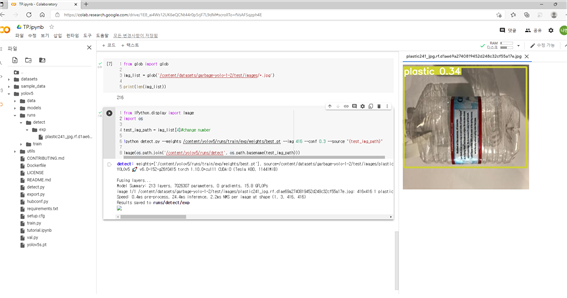